## The solution is divided into the following sections:

###### Data understanding and exploration
###### - Data cleaning
###### - Data preparation
###### - Model building and evaluation
###### - Summary of data: 200 rows, 26 columns, no null values

## 1. Import the libraries and load the dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


In [2]:
data = pd.read_csv('auto_imports.csv',na_values=['?'])
data.head()

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500
1,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500
2,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950
3,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450
4,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,15250


In [3]:
data.shape

(200, 26)

In [4]:
data.set_axis(["symboling","normalizedlosses","CarName","fueltype","aspiration","doornumber","carbody","drivewheel","enginelocation","wheelbase","carlength","carwidth","carheight","curbweight","enginetype","cylindernumber","enginesize","fuelsystem","boreratio","stroke","compressionratio","horsepower","peakrpm","citympg","highwaympg","price"],axis="columns",inplace=True)

In [5]:
data.head()

,symboling,normalizedlosses,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500
1,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500
2,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950
3,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450
4,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,15250


In [6]:
data.shape

(200, 26)

#### Processing missed values
- Collect statistics for missed values:

In [7]:
# for example for below for loop logic
missed = data.shape[0]
missed

200

In [8]:
# for example for below for loop logic
data['normalizedlosses'].dropna().shape[0]

164

In [9]:
# see the missed value
na_cols = {}
for col in data.columns:
    missed = data.shape[0] - data[col].dropna().shape[0]
    if missed > 0:
        na_cols[col] = missed

na_cols

{'normalizedlosses': 36,
 'doornumber': 2,
 'boreratio': 4,
 'stroke': 4,
 'horsepower': 2,
 'peakrpm': 2}


### Handing the Null Values Present in the Dataset

In [10]:
data.isnull().sum()

symboling            0
normalizedlosses    36
CarName              0
fueltype             0
aspiration           0
doornumber           2
carbody              0
drivewheel           0
enginelocation       0
wheelbase            0
carlength            0
carwidth             0
carheight            0
curbweight           0
enginetype           0
cylindernumber       0
enginesize           0
fuelsystem           0
boreratio            4
stroke               4
compressionratio     0
horsepower           2
peakrpm              2
citympg              0
highwaympg           0
price                0
dtype: int64

### Normalizedlosses

In [11]:
data1=data.copy()
data1.head()

,symboling,normalizedlosses,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500
1,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500
2,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950
3,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450
4,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,15250


In [12]:
data1.loc[data1['normalizedlosses'].isnull()==True,'normalizedlosses']=np.median(data1['normalizedlosses'].dropna(axis=0))
data1.head()

,symboling,normalizedlosses,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,115.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500
1,1,115.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500
2,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950
3,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450
4,2,115.0,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,15250


### doornumber     

In [13]:
data1.doornumber.value_counts()

four    113
two      85
Name: doornumber, dtype: int64

In [14]:
data1.loc[data1['doornumber'].isnull()==True,'doornumber']='four'

### boreratio    

In [15]:
data1.loc[data1['boreratio'].isnull()==True,'boreratio']=np.median(data1['boreratio'].dropna(axis=0))

### stroke

In [16]:
data1.loc[data1['stroke'].isnull()==True,'stroke']=np.median(data1['stroke'].dropna(axis=0))

### horsepower

In [17]:
data1.loc[data1['horsepower'].isnull()==True,'horsepower']=np.median(data1['horsepower'].dropna(axis=0))

### peakrpm

In [18]:
data1.loc[data1['peakrpm'].isnull()==True,'peakrpm']=np.median(data1['peakrpm'].dropna(axis=0))

In [19]:
data.head()

,symboling,normalizedlosses,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500
1,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500
2,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950
3,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450
4,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,15250


In [20]:
na_cols = {}
for col in data1.columns:
    missed = data1.shape[0] - data1[col].dropna().shape[0]
    if missed > 0:
        na_cols[col] = missed

na_cols

{}

In [21]:
data1[np.any(data1[data1.columns].isnull(), axis=1)]

,symboling,normalizedlosses,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


In [22]:
data1.head()

,symboling,normalizedlosses,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,115.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500
1,1,115.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500
2,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950
3,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450
4,2,115.0,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,15250


In [23]:
data1.shape

(200, 26)

In [24]:
data1.describe()

,symboling,normalizedlosses,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.830000,120.740000,98.848000,174.228000,65.898000,53.791500,2555.705000,126.860000,3.329600,3.260450,10.170100,103.275000,5119.000000,25.200000,30.705000,13205.690000
std,1.248557,32.189645,6.038261,12.347132,2.102904,2.428449,518.594552,41.650501,0.268577,0.314205,4.014163,37.464749,479.309596,6.432487,6.827227,7966.982558
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,100.250000,94.500000,166.675000,64.175000,52.000000,2163.000000,97.750000,3.150000,3.117500,8.575000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,115.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,119.500000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10270.000000
75%,2.000000,138.250000,102.400000,183.500000,66.675000,55.525000,2928.250000,142.000000,3.582500,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.750000
max,3.000000,256.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000


In [25]:
data1.columns

Index(['symboling', 'normalizedlosses', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

### Description about Car
- drivewheel type:-rwd(Rear Wheel Drive):- RWD means that the power from the engine is delivered to the rear wheels and the rear wheels push the car forward.The front wheels do not receive any power and are free to manoeuvre the vehicle.
  fwr(Front Wheel Drive):-FWD means that the power from the engine is only delivered to the front wheels of vehicle. The rear wheels don’t receive any power on their own
- 4wd(Four Wheel Drive):-4WD means the power from the engine is delivered to all 4 wheels all of the time 4X4 is engaged.
- Cylindernumber:- A cylinder is a crucial part of the engine where fuel is combusted and power is generated.It consists of a piston, an inlet, and exhaust valves at the top.
- FuelSystem:- The fuel system in a vehicle consists of a few components that help transfer fuel from the tank to the engine for combustion.

In [26]:
CompanyName=data1['CarName'].apply(lambda x: x.split(' ')[0])
data1.insert(3,"CompanyName",CompanyName)
data1.drop('CarName',axis=1,inplace=True)
data1.head()

,symboling,normalizedlosses,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,115.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500
1,1,115.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500
2,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950
3,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450
4,2,115.0,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,15250


In [27]:
## Catogirical Columns
print('CompanyName', data1['CompanyName'].unique())
print('fueltype', data1['fueltype'].unique())
print('aspiration', data1['aspiration'].unique())
print('doornumber', data1['doornumber'].unique())
print('carbody',data1['carbody'].unique())
print('drivewheel',data1['drivewheel'].unique())
print('enginelocation',data1['enginelocation'].unique())
print('cylindernumber',data1['cylindernumber'].unique())
print('fuelsystem',data1['fuelsystem'].unique())

CompanyName ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']
fueltype ['gas' 'diesel']
aspiration ['std' 'turbo']
doornumber ['two' 'four']
carbody ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
drivewheel ['rwd' 'fwd' '4wd']
enginelocation ['front' 'rear']
cylindernumber ['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
fuelsystem ['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


### Fixing invalid values
- There seems to be some spelling error in the CompanyName column.
- alfa-romero=alfaromeo
- maxda = mazda
- Nissan = nissan
- toyouta = toyota
- vokswagen = volkswagen = vw

In [28]:
data1.CompanyName = data1.CompanyName.str.lower()

def replace_name(a,b):
    data1.CompanyName.replace(a,b,inplace=True)
    
replace_name('alfa-romero','alfaromeo')    
replace_name('maxda','mazda')
replace_name('Nissan','nissan')
replace_name('porsche','Porsche')
replace_name('volkswagen','vw')
replace_name('toyouta','toyota')

data1.CompanyName.unique()

array(['alfaromeo', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda', 'isuzu',
       'jaguar', 'mazda', 'mercedes-benz', 'mercury', 'mitsubishi',
       'nissan', 'peugot', 'plymouth', 'Porsche', 'renault', 'saab',
       'subaru', 'toyota', 'vw', 'volvo'], dtype=object)

In [29]:
#Checking for duplicates
data1.loc[data1.duplicated()]

,symboling,normalizedlosses,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


In [30]:
# all the null value has been remove
data1.isnull().sum()

symboling           0
normalizedlosses    0
CompanyName         0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

##  The Correlation between Columns

In [31]:
data1.corr()

,symboling,normalizedlosses,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
symboling,1.000000,0.462765,-0.529145,-0.364511,-0.237262,-0.542261,-0.234743,-0.112069,-0.148260,0.011596,-0.181073,0.074270,0.284204,-0.030158,0.041248,-0.083327
normalizedlosses,0.462765,1.000000,-0.077168,-0.009513,0.061155,-0.377599,0.065385,0.073660,-0.051668,0.044772,-0.116261,0.182697,0.245735,-0.194700,-0.151379,0.094406
wheelbase,-0.529145,-0.077168,1.000000,0.879005,0.814593,0.583789,0.787584,0.576779,0.502386,0.143529,0.249689,0.376616,-0.365699,-0.480029,-0.552211,0.589147
carlength,-0.364511,-0.009513,0.879005,1.000000,0.857271,0.492955,0.881058,0.685531,0.611417,0.120060,0.159203,0.579478,-0.286029,-0.667658,-0.700186,0.691044
carwidth,-0.237262,0.061155,0.814593,0.857271,1.000000,0.300995,0.867720,0.731100,0.548589,0.182657,0.189008,0.616214,-0.246821,-0.638155,-0.684700,0.752795
carheight,-0.542261,-0.377599,0.583789,0.492955,0.300995,1.000000,0.310660,0.076255,0.190367,-0.084595,0.259526,-0.084872,-0.316376,-0.057087,-0.111568,0.137284
curbweight,-0.234743,0.065385,0.787584,0.881058,0.867720,0.310660,1.000000,0.849090,0.644914,0.168089,0.156444,0.758058,-0.279491,-0.750390,-0.795515,0.834420
enginesize,-0.112069,0.073660,0.576779,0.685531,0.731100,0.076255,0.849090,1.000000,0.574708,0.205467,0.029005,0.822188,-0.256453,-0.651002,-0.679877,0.872337
boreratio,-0.148260,-0.051668,0.502386,0.611417,0.548589,0.190367,0.644914,0.574708,1.000000,-0.051221,0.002308,0.565231,-0.268877,-0.579367,-0.589031,0.543436
stroke,0.011596,0.044772,0.143529,0.120060,0.182657,-0.084595,0.168089,0.205467,-0.051221,1.000000,0.186374,0.096265,-0.059117,-0.043207,-0.042455,0.083243


In [32]:
data1.corr()['price']

symboling          -0.083327
normalizedlosses    0.094406
wheelbase           0.589147
carlength           0.691044
carwidth            0.752795
carheight           0.137284
curbweight          0.834420
enginesize          0.872337
boreratio           0.543436
stroke              0.083243
compressionratio    0.071176
horsepower          0.810551
peakrpm            -0.102281
citympg            -0.687186
highwaympg         -0.705115
price               1.000000
Name: price, dtype: float64

### Analysis
- Correlation between symboling and losses
- We can plot shifted and scaled symboling values along normalized_losses and take a look, if there's something in common in these features.

<AxesSubplot:xlabel='symboling', ylabel='normalizedlosses'>

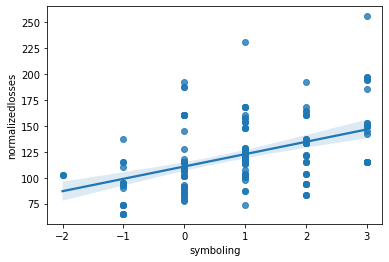

In [33]:
sns.regplot(x='symboling', y='normalizedlosses', data=data1)

# Price and normalized losses distribution analysis

### Visualizing the data

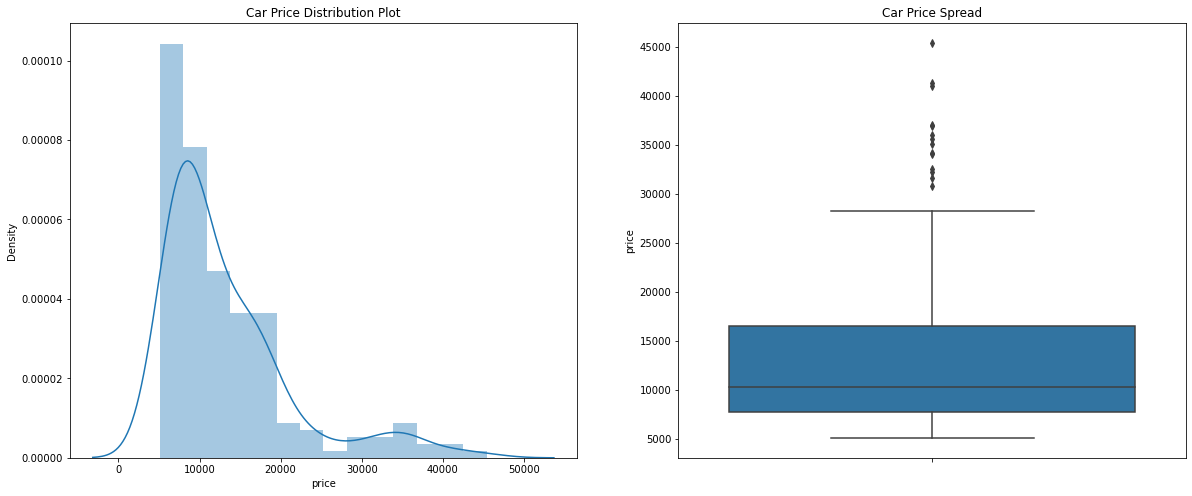

In [34]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(data1.price)

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=data1.price)

plt.show()

In [35]:
print(data1.price.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1]))

count      200.000000
mean     13205.690000
std       7966.982558
min       5118.000000
25%       7775.000000
50%      10270.000000
75%      16500.750000
85%      18450.000000
90%      22485.500000
100%     45400.000000
max      45400.000000
Name: price, dtype: float64


##### Inference
- The plot seemed to be skewed, meaning  that the most price of datasets are low(below=15,000).
- There are significant difference between the mean and the median of the price distribution.
- The data price far spread out from the mean which indicates a high variance in the car price(85% of the price
   are below 18500, where rhe remaning the 15% are between 18500 to 454000).

## Removing the outlire of price

In [36]:
Q1=data1.price.quantile(0.25)
Q3=data1.price.quantile(0.75)

In [37]:
IQR=Q3-Q1
IQR

8725.75

In [38]:
upper_limit=Q3+1.5*IQR
lower_limit=Q1-1.5*IQR

In [39]:
data1[data1['price']<lower_limit]

,symboling,normalizedlosses,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


In [40]:
data1[data1['price']>upper_limit]

,symboling,normalizedlosses,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
13,0,115.0,bmw,gas,std,four,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182.0,5400.0,16,22,30760
14,0,115.0,bmw,gas,std,two,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182.0,5400.0,16,22,41315
15,0,115.0,bmw,gas,std,four,sedan,rwd,front,110.0,...,209,mpfi,3.62,3.39,8.0,182.0,5400.0,15,20,36880
43,0,145.0,jaguar,gas,std,four,sedan,rwd,front,113.0,...,258,mpfi,3.63,4.17,8.1,176.0,4750.0,15,19,32250
44,0,115.0,jaguar,gas,std,four,sedan,rwd,front,113.0,...,258,mpfi,3.63,4.17,8.1,176.0,4750.0,15,19,35550
45,0,115.0,jaguar,gas,std,two,sedan,rwd,front,102.0,...,326,mpfi,3.54,2.76,11.5,262.0,5000.0,13,17,36000
66,-1,93.0,mercedes-benz,diesel,turbo,four,sedan,rwd,front,115.6,...,183,idi,3.58,3.64,21.5,123.0,4350.0,22,25,31600
67,-1,115.0,mercedes-benz,gas,std,four,sedan,rwd,front,115.6,...,234,mpfi,3.46,3.10,8.3,155.0,4750.0,16,18,34184
68,3,142.0,mercedes-benz,gas,std,two,convertible,rwd,front,96.6,...,234,mpfi,3.46,3.10,8.3,155.0,4750.0,16,18,35056
69,0,115.0,mercedes-benz,gas,std,four,sedan,rwd,front,120.9,...,308,mpfi,3.80,3.35,8.0,184.0,4500.0,14,16,40960


In [41]:
data1.loc[data1['price']>upper_limit,'price']=np.mean(data1.price)

In [42]:
data1[data1['price']>upper_limit]

,symboling,normalizedlosses,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


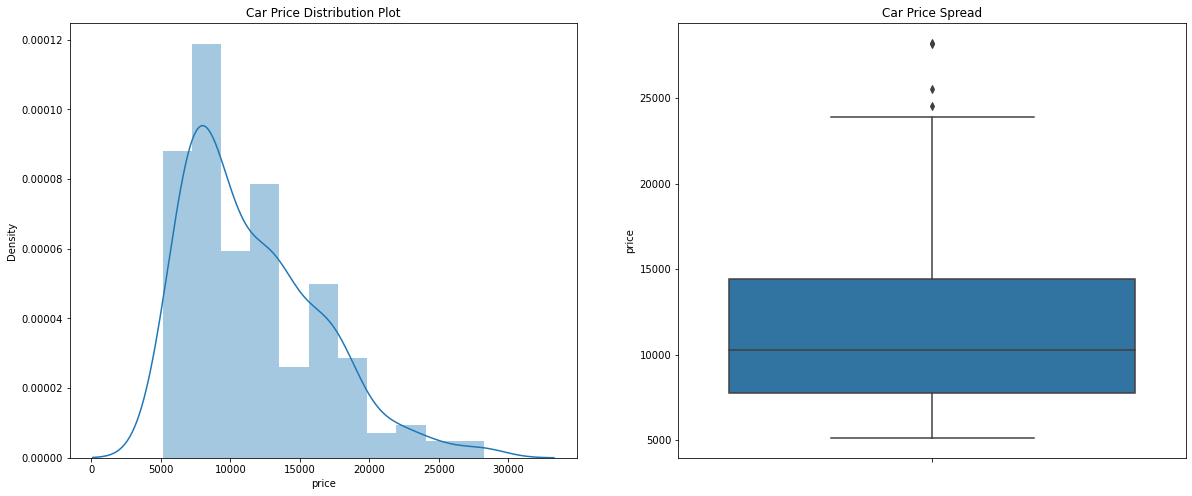

In [43]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(data1.price)

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=data1.price)

plt.show()

## Visualising Categorical Data

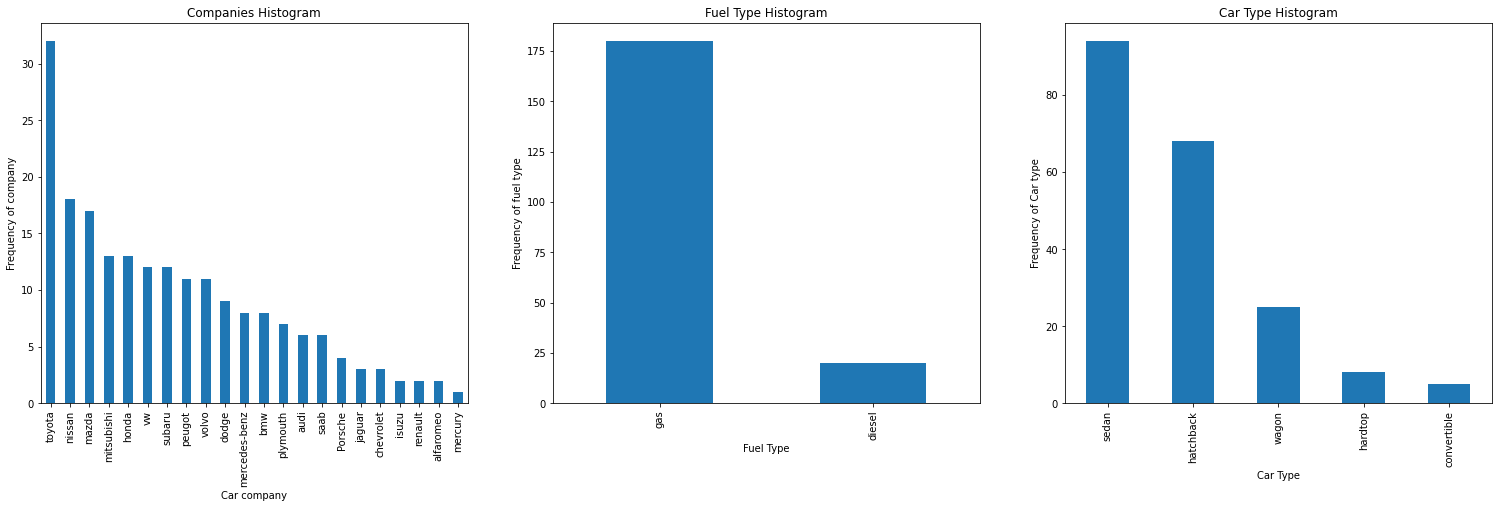

In [44]:
plt.figure(figsize=(26, 7))

plt.subplot(1,3,1)
plt1 = data1.CompanyName.value_counts().plot.bar('')
plt.title('Companies Histogram')
plt1.set(xlabel = 'Car company', ylabel='Frequency of company')

plt.subplot(1,3,2)
plt1 = data1.fueltype.value_counts().plot.bar()
plt.title('Fuel Type Histogram')
plt1.set(xlabel = 'Fuel Type', ylabel='Frequency of fuel type')

plt.subplot(1,3,3)
plt1 = data1.carbody.value_counts().plot.bar()
plt.title('Car Type Histogram')
plt1.set(xlabel = 'Car Type', ylabel='Frequency of Car type')

plt.show()

### Inference
- Toyota seemed to be favored car company.
- Number of Gas fueled car are more than Diesel.
- Sedan is the top car type prefered

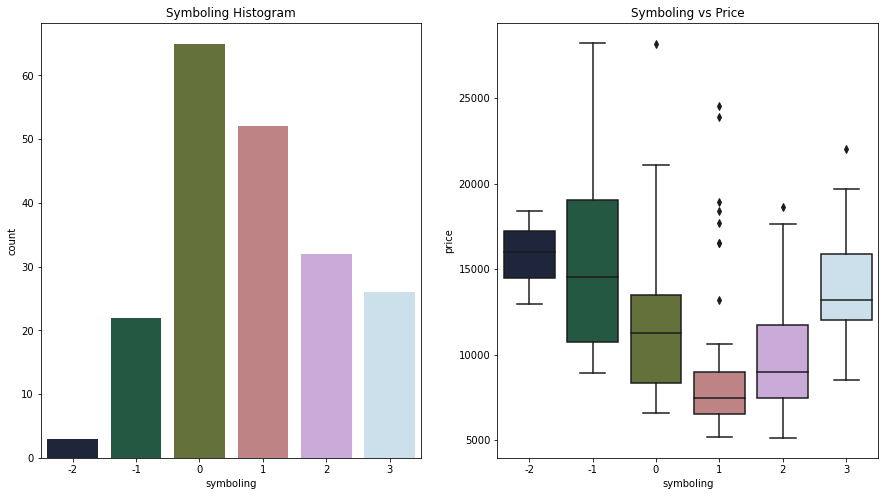

In [45]:
plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
plt.title('Symboling Histogram')
sns.countplot(data1.symboling,palette=("cubehelix"))

plt.subplot(1,2,2)
plt.title('Symboling vs Price')
sns.boxplot(x=data1.symboling, y=data1.price, palette=("cubehelix"))

plt.show()

### Inference
- It seems that Symboling with 0 and 1 valuse have high number of row(i.e. They are most sold.)
- The cars with -1 symboling seems to be high priced (as it makes sense too, insurance risk rating -1 is quite good).
  But it seems that symboling with 3 value has the price range similar to -2 value. There is a dip in price at symboling 1.

In [46]:
df = pd.DataFrame(data1.groupby(['enginetype'])['price'].mean().sort_values(ascending = False))
df

,price
enginetype,
ohcv,15439.034615
dohc,14773.943636
l,14627.583333
rotor,13020.000000
ohc,10962.308690
ohcf,9474.138000


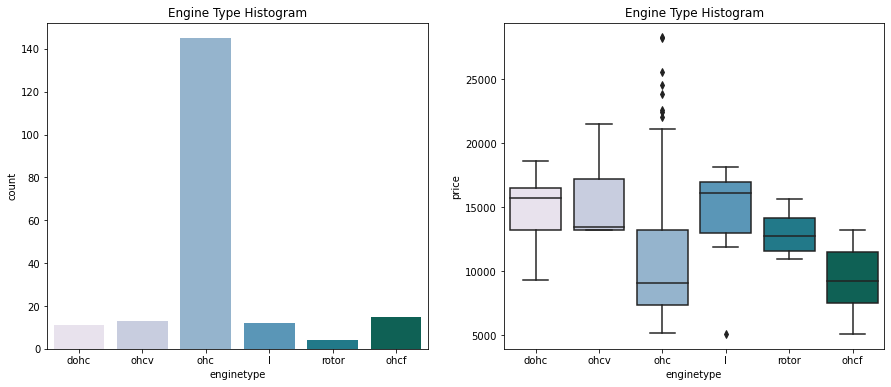

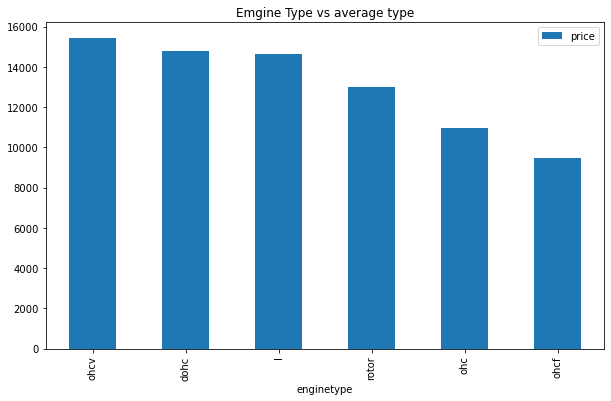

In [47]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plt.title('Engine Type Histogram')
sns.countplot(x=data1.enginetype, palette=("PuBuGn"))

plt.subplot(1,2,2)
plt.title('Engine Type Histogram')
sns.boxplot(x=data1.enginetype, y=data1.price,palette=('PuBuGn'))

plt.show()

df = pd.DataFrame(data1.groupby(['enginetype'])['price'].mean().sort_values(ascending = False))
df.plot.bar(figsize=(10,6))
plt.title('Emgine Type vs average type')
plt.show()

### Inference
- ohc Engine type seems to be most favored type.
- ohcv has the highest price range (While dohcv has only one row), ohc and ohcf have the low price range.

<Figure size 1800x360 with 0 Axes>

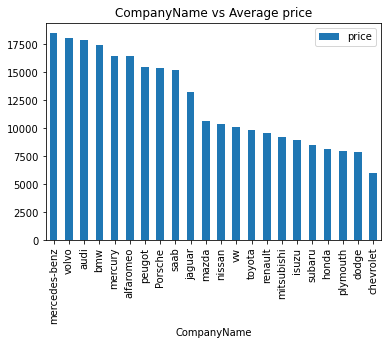

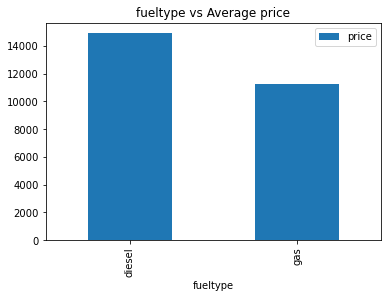

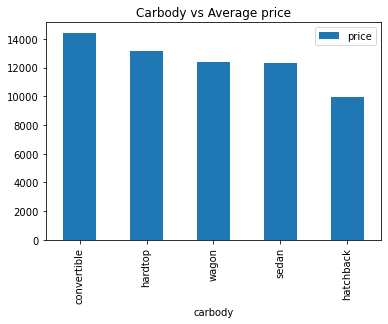

In [48]:
plt.figure(figsize=(25,5))

df=pd.DataFrame(data1.groupby(['CompanyName'])['price'].mean().sort_values(ascending=False))
df.plot.bar()
plt.title('CompanyName vs Average price')
plt.show()

df=pd.DataFrame(data1.groupby(['fueltype'])['price'].mean().sort_values(ascending=False))
df.plot.bar()
plt.title('fueltype vs Average price')
plt.show()

df=pd.DataFrame(data1.groupby(['carbody'])['price'].mean().sort_values(ascending=False))
df.plot.bar()
plt.title('Carbody vs Average price')
plt.show()


### Inference
- jaguar and buick seemes to have highest average price.
- Diesel has higher average price than gas.
- hardtop and convertible have higher average orice.

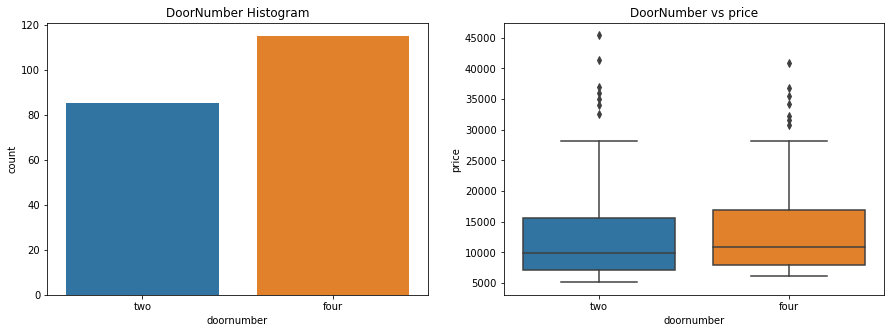

<AxesSubplot:title={'center':'Aspiration vs price'}, xlabel='aspiration', ylabel='price'>

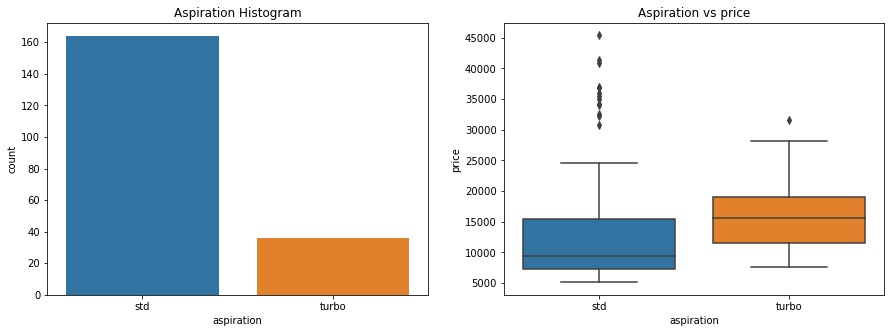

In [49]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('DoorNumber Histogram')
sns.countplot(data1.doornumber)

plt.subplot(1,2,2)
plt.title('DoorNumber vs price')
sns.boxplot(data1.doornumber, data.price)

plt.show()

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title('Aspiration Histogram')
sns.countplot(data1.aspiration)

plt.subplot(1,2,2)
plt.title('Aspiration vs price')
sns.boxplot(data1.aspiration,data.price)

### Inference
- door number variable is not affacting the price much. There is no sugnificent defference between categories in it.
- It seems aspiration with turbo have higher price range than the std(though it has some high values outside the whiskers.)

### Visualising Numerical Data

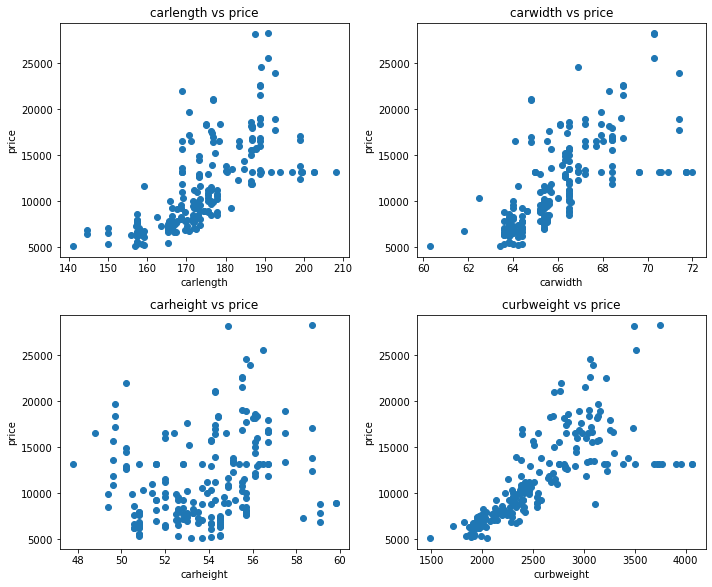

In [50]:
def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(data1[x],data1.price)
    plt.title(x+' vs price')
    plt.ylabel('price')
    plt.xlabel(x)
    
plt.figure(figsize=(10,20))

scatter('carlength',1)
scatter('carwidth',2)
scatter('carheight',3)
scatter('curbweight',4)

plt.tight_layout()

### Inference
- carlenght, carwidth and caurweight seemes to have that positive correlation with price.
- but carhight doesn't show any significant trend with price.

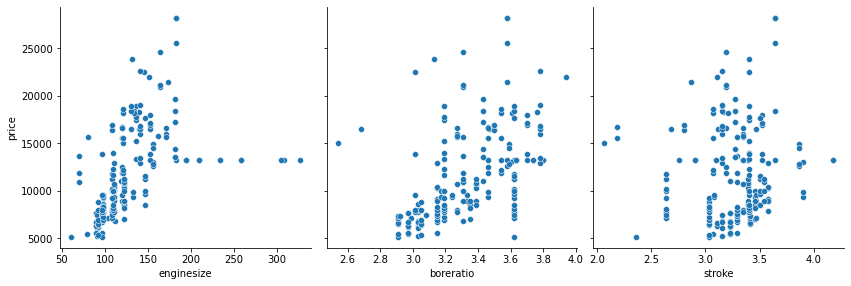

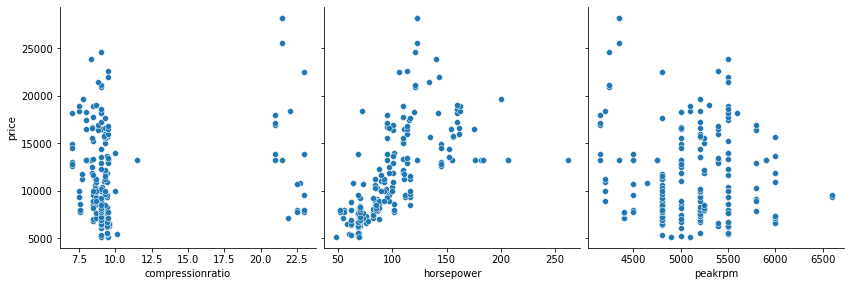

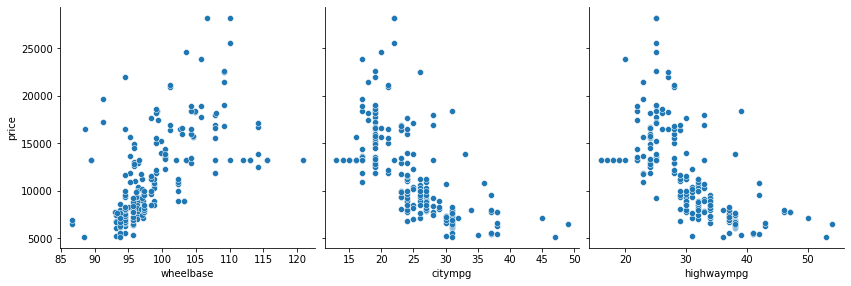

In [51]:
def pairplot(x,y,z):
    sns.pairplot(data1, x_vars=[x,y,z],y_vars='price', size=4, aspect=1, kind='scatter')
    plt.show()
    
pairplot('enginesize', 'boreratio', 'stroke')
pairplot('compressionratio', 'horsepower', 'peakrpm')
pairplot('wheelbase', 'citympg', 'highwaympg')

### Inference
- enginesize, boreratio, horsepower, wheelbase - seem to have a significant positive correlation with price.
- citympg, highwaympg - seem to have a significant negative correlation with price.

## Removing Outlier 

### Enginesize

<AxesSubplot:xlabel='enginesize'>

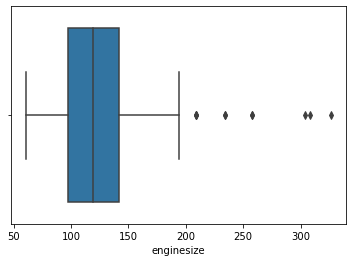

In [52]:
sns.boxplot(data1.enginesize)

In [53]:
Q1=data1.enginesize.quantile(0.25)
Q3=data1.enginesize.quantile(0.75)
print(Q1," ",Q3)

97.75   142.0


In [54]:
IQR=Q3-Q1
IQR

44.25

In [55]:
upper_limit=Q3+1.5*IQR
lower_limt=Q1-1.5*IQR

In [56]:
data1.loc[data1['enginesize']<lower_limt]

,symboling,normalizedlosses,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


In [57]:
data1.loc[data1['enginesize']>upper_limit]

,symboling,normalizedlosses,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
13,0,115.0,bmw,gas,std,four,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182.0,5400.0,16,22,13205.69
14,0,115.0,bmw,gas,std,two,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182.0,5400.0,16,22,13205.69
15,0,115.0,bmw,gas,std,four,sedan,rwd,front,110.0,...,209,mpfi,3.62,3.39,8.0,182.0,5400.0,15,20,13205.69
43,0,145.0,jaguar,gas,std,four,sedan,rwd,front,113.0,...,258,mpfi,3.63,4.17,8.1,176.0,4750.0,15,19,13205.69
44,0,115.0,jaguar,gas,std,four,sedan,rwd,front,113.0,...,258,mpfi,3.63,4.17,8.1,176.0,4750.0,15,19,13205.69
45,0,115.0,jaguar,gas,std,two,sedan,rwd,front,102.0,...,326,mpfi,3.54,2.76,11.5,262.0,5000.0,13,17,13205.69
67,-1,115.0,mercedes-benz,gas,std,four,sedan,rwd,front,115.6,...,234,mpfi,3.46,3.10,8.3,155.0,4750.0,16,18,13205.69
68,3,142.0,mercedes-benz,gas,std,two,convertible,rwd,front,96.6,...,234,mpfi,3.46,3.10,8.3,155.0,4750.0,16,18,13205.69
69,0,115.0,mercedes-benz,gas,std,four,sedan,rwd,front,120.9,...,308,mpfi,3.80,3.35,8.0,184.0,4500.0,14,16,13205.69
70,1,115.0,mercedes-benz,gas,std,two,hardtop,rwd,front,112.0,...,304,mpfi,3.80,3.35,8.0,184.0,4500.0,14,16,13205.69


In [58]:
data1.loc[data1['enginesize']>upper_limit,'enginesize']=np.mean(data.enginesize)

In [59]:
data1.loc[data1['enginesize']>upper_limit]

,symboling,normalizedlosses,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


### Stroke

<AxesSubplot:xlabel='stroke'>

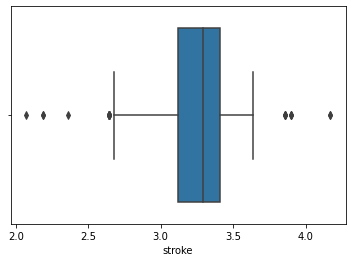

In [60]:
sns.boxplot(data1.stroke)

In [61]:
Q1=data1.stroke.quantile(0.25)
Q3=data1.stroke.quantile(0.75)
IQR=Q3-Q1
IQR

0.2925

In [62]:
upper_limit=Q3+1.5*IQR
lower_limit=Q1-1.5*IQR

In [63]:
data1.loc[data1['stroke']<lower_limit,'stroke']=np.mean(data1.stroke)

In [64]:
data1.loc[data1['stroke']>upper_limit,'stroke']=np.mean(data1.stroke)

<AxesSubplot:xlabel='stroke'>

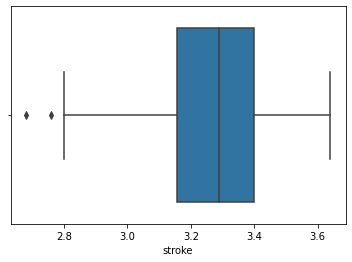

In [65]:
sns.boxplot(data1.stroke)

### Compressionratio

<AxesSubplot:xlabel='compressionratio'>

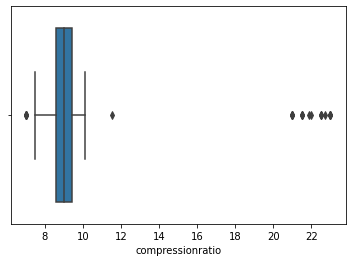

In [66]:
sns.boxplot(data1.compressionratio)

In [67]:
Q1=data1.compressionratio.quantile(0.25)
Q3=data1.compressionratio.quantile(0.75)

In [68]:
QIR=Q3-Q1
upper_limit=Q3+1.5*IQR
lower_limit=Q1-1.5*IQR

In [69]:
data1.loc[data1['compressionratio']>upper_limit,'compressionratio']=np.mean(data1.compressionratio)

<AxesSubplot:xlabel='compressionratio'>

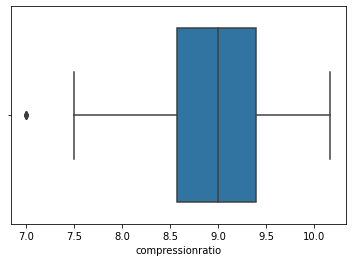

In [70]:
sns.boxplot(data1.compressionratio)

#### Deriving new features

In [71]:
data1['fueleconomy']=(0.55*data1['citympg'])+(0.45 * data1['highwaympg'])
data1.head()

,symboling,normalizedlosses,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueleconomy
0,3,115.0,alfaromeo,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0000,111.0,5000.0,21,27,16500.0,23.70
1,1,115.0,alfaromeo,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0000,154.0,5000.0,19,26,16500.0,22.15
2,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.1701,102.0,5500.0,24,30,13950.0,26.70
3,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0000,115.0,5500.0,18,22,17450.0,19.80
4,2,115.0,audi,gas,std,two,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,8.5000,110.0,5500.0,19,25,15250.0,21.70


<AxesSubplot:xlabel='fueleconomy'>

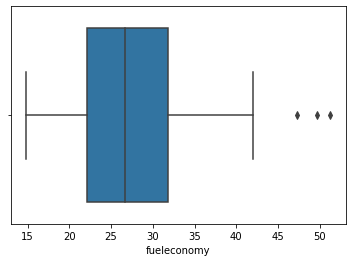

In [72]:
sns.boxplot(data1.fueleconomy)

In [73]:
Q1=data1.fueleconomy.quantile(0.25)
Q3=data1.fueleconomy.quantile(0.75)
IQR=Q3-Q1

In [74]:
data1.loc[data1['fueleconomy']>Q3+1.5*IQR]

,symboling,normalizedlosses,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueleconomy
16,2,121.0,chevrolet,gas,std,two,hatchback,fwd,front,88.4,...,2bbl,2.91,3.03,9.5000,48.0,5100.0,47,53,5151.0,49.70
28,2,137.0,honda,gas,std,two,hatchback,fwd,front,86.6,...,1bbl,2.91,3.41,9.6000,58.0,4800.0,49,54,6479.0,51.25
86,1,128.0,nissan,diesel,std,two,sedan,fwd,front,94.5,...,idi,2.99,3.47,10.1701,55.0,4800.0,45,50,7099.0,47.25


In [75]:
#data1.loc[data1['fueleconomy']>Q3+1.5*IQR,'fueleconomy']=np.mean(data1.fueleconomy)

### Bivariate Analysis

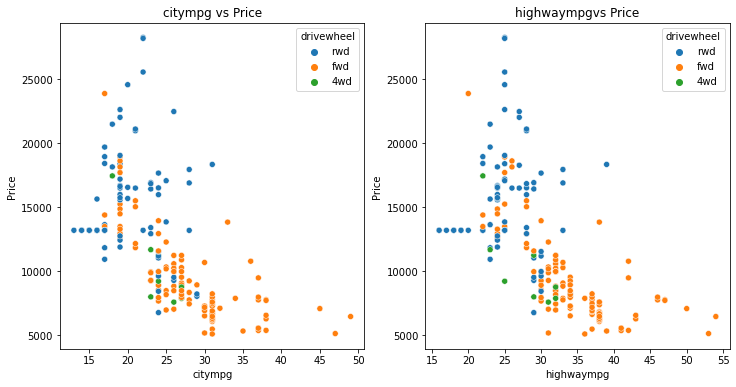

<Figure size 432x288 with 0 Axes>

In [76]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.title('citympg vs Price')
sns.scatterplot(x=data1['citympg'],y=data1['price'],hue=data1['drivewheel'])
plt.xlabel('citympg')
plt.ylabel('Price')

plt.subplot(1,2,2)
plt.title('highwaympgvs Price')
sns.scatterplot(x=data1['highwaympg'],y=data1['price'],hue=data1['drivewheel'])
plt.xlabel('highwaympg')
plt.ylabel('Price')

plt.show()
plt.tight_layout()

### Inference
- fueleconomy has an obvios negative correlation with price and is significant.

### List of significant variables after Visual analysis

In [77]:
data2 = data1[['CompanyName', 'price','normalizedlosses', 'fueltype', 'aspiration','carbody', 'drivewheel','wheelbase',
                  'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'boreratio','horsepower', 
                    'citympg','highwaympg', 'carlength','carwidth']]

In [78]:
data2.head()

,CompanyName,price,normalizedlosses,fueltype,aspiration,carbody,drivewheel,wheelbase,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,citympg,highwaympg,carlength,carwidth
0,alfaromeo,16500.0,115.0,gas,std,convertible,rwd,88.6,2548,dohc,four,130.0,3.47,111.0,21,27,168.8,64.1
1,alfaromeo,16500.0,115.0,gas,std,hatchback,rwd,94.5,2823,ohcv,six,152.0,2.68,154.0,19,26,171.2,65.5
2,audi,13950.0,164.0,gas,std,sedan,fwd,99.8,2337,ohc,four,109.0,3.19,102.0,24,30,176.6,66.2
3,audi,17450.0,164.0,gas,std,sedan,4wd,99.4,2824,ohc,five,136.0,3.19,115.0,18,22,176.6,66.4
4,audi,15250.0,115.0,gas,std,sedan,fwd,99.8,2507,ohc,five,136.0,3.19,110.0,19,25,177.3,66.3


In [79]:
data2.shape

(200, 18)

## Categorical data convert into numrical

In [80]:
from sklearn.preprocessing import LabelEncoder
lbc=LabelEncoder()

In [81]:
data2.fueltype=lbc.fit_transform(data2.fueltype)
data2.aspiration=lbc.fit_transform(data2.aspiration)

In [82]:
data2.head()

,CompanyName,price,normalizedlosses,fueltype,aspiration,carbody,drivewheel,wheelbase,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,citympg,highwaympg,carlength,carwidth
0,alfaromeo,16500.0,115.0,1,0,convertible,rwd,88.6,2548,dohc,four,130.0,3.47,111.0,21,27,168.8,64.1
1,alfaromeo,16500.0,115.0,1,0,hatchback,rwd,94.5,2823,ohcv,six,152.0,2.68,154.0,19,26,171.2,65.5
2,audi,13950.0,164.0,1,0,sedan,fwd,99.8,2337,ohc,four,109.0,3.19,102.0,24,30,176.6,66.2
3,audi,17450.0,164.0,1,0,sedan,4wd,99.4,2824,ohc,five,136.0,3.19,115.0,18,22,176.6,66.4
4,audi,15250.0,115.0,1,0,sedan,fwd,99.8,2507,ohc,five,136.0,3.19,110.0,19,25,177.3,66.3


In [83]:
### Carbody

In [84]:
data2.carbody.value_counts()

sedan          94
hatchback      68
wagon          25
hardtop         8
convertible     5
Name: carbody, dtype: int64

In [85]:
data2.carbody=data2.carbody.map({'sedan':4,'hatchback':3,'wagon':2,'hardtop':1,'convertible':0})
data2.head()

,CompanyName,price,normalizedlosses,fueltype,aspiration,carbody,drivewheel,wheelbase,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,citympg,highwaympg,carlength,carwidth
0,alfaromeo,16500.0,115.0,1,0,0,rwd,88.6,2548,dohc,four,130.0,3.47,111.0,21,27,168.8,64.1
1,alfaromeo,16500.0,115.0,1,0,3,rwd,94.5,2823,ohcv,six,152.0,2.68,154.0,19,26,171.2,65.5
2,audi,13950.0,164.0,1,0,4,fwd,99.8,2337,ohc,four,109.0,3.19,102.0,24,30,176.6,66.2
3,audi,17450.0,164.0,1,0,4,4wd,99.4,2824,ohc,five,136.0,3.19,115.0,18,22,176.6,66.4
4,audi,15250.0,115.0,1,0,4,fwd,99.8,2507,ohc,five,136.0,3.19,110.0,19,25,177.3,66.3


In [86]:
data2.drivewheel.value_counts()

fwd    118
rwd     74
4wd      8
Name: drivewheel, dtype: int64

In [87]:
data2.drivewheel=data2.drivewheel.map({'fwd':2,'rwd':1,'4wd':0})
data2.head()

,CompanyName,price,normalizedlosses,fueltype,aspiration,carbody,drivewheel,wheelbase,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,citympg,highwaympg,carlength,carwidth
0,alfaromeo,16500.0,115.0,1,0,0,1,88.6,2548,dohc,four,130.0,3.47,111.0,21,27,168.8,64.1
1,alfaromeo,16500.0,115.0,1,0,3,1,94.5,2823,ohcv,six,152.0,2.68,154.0,19,26,171.2,65.5
2,audi,13950.0,164.0,1,0,4,2,99.8,2337,ohc,four,109.0,3.19,102.0,24,30,176.6,66.2
3,audi,17450.0,164.0,1,0,4,0,99.4,2824,ohc,five,136.0,3.19,115.0,18,22,176.6,66.4
4,audi,15250.0,115.0,1,0,4,2,99.8,2507,ohc,five,136.0,3.19,110.0,19,25,177.3,66.3


In [88]:
data2.enginetype.value_counts()

ohc      145
ohcf      15
ohcv      13
l         12
dohc      11
rotor      4
Name: enginetype, dtype: int64

In [89]:
data2.enginetype=data2.enginetype.map({'ohc':6,'ohcf':5,'ohcv':4,'dohc':3,'l':2,'rotor':1,'dohcv':0})
data2.head()

,CompanyName,price,normalizedlosses,fueltype,aspiration,carbody,drivewheel,wheelbase,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,citympg,highwaympg,carlength,carwidth
0,alfaromeo,16500.0,115.0,1,0,0,1,88.6,2548,3,four,130.0,3.47,111.0,21,27,168.8,64.1
1,alfaromeo,16500.0,115.0,1,0,3,1,94.5,2823,4,six,152.0,2.68,154.0,19,26,171.2,65.5
2,audi,13950.0,164.0,1,0,4,2,99.8,2337,6,four,109.0,3.19,102.0,24,30,176.6,66.2
3,audi,17450.0,164.0,1,0,4,0,99.4,2824,6,five,136.0,3.19,115.0,18,22,176.6,66.4
4,audi,15250.0,115.0,1,0,4,2,99.8,2507,6,five,136.0,3.19,110.0,19,25,177.3,66.3


In [90]:
data2.cylindernumber.value_counts()

four      156
six        24
five       10
two         4
eight       4
three       1
twelve      1
Name: cylindernumber, dtype: int64

In [91]:
data2.cylindernumber=data2.cylindernumber.map({'twelve':12,'eight':8,'six':6,'five':5,'four':4,'three':3,'two':2})
data2.head()

,CompanyName,price,normalizedlosses,fueltype,aspiration,carbody,drivewheel,wheelbase,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,citympg,highwaympg,carlength,carwidth
0,alfaromeo,16500.0,115.0,1,0,0,1,88.6,2548,3,4,130.0,3.47,111.0,21,27,168.8,64.1
1,alfaromeo,16500.0,115.0,1,0,3,1,94.5,2823,4,6,152.0,2.68,154.0,19,26,171.2,65.5
2,audi,13950.0,164.0,1,0,4,2,99.8,2337,6,4,109.0,3.19,102.0,24,30,176.6,66.2
3,audi,17450.0,164.0,1,0,4,0,99.4,2824,6,5,136.0,3.19,115.0,18,22,176.6,66.4
4,audi,15250.0,115.0,1,0,4,2,99.8,2507,6,5,136.0,3.19,110.0,19,25,177.3,66.3


In [92]:
dummies=pd.get_dummies(data2.CompanyName)
dummies.head(3)

,Porsche,alfaromeo,audi,bmw,chevrolet,dodge,honda,isuzu,jaguar,mazda,...,mitsubishi,nissan,peugot,plymouth,renault,saab,subaru,toyota,volvo,vw
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [93]:
data3=pd.concat([data2,dummies],axis='columns')
data3.head(4)

,CompanyName,price,normalizedlosses,fueltype,aspiration,carbody,drivewheel,wheelbase,curbweight,enginetype,...,mitsubishi,nissan,peugot,plymouth,renault,saab,subaru,toyota,volvo,vw
0,alfaromeo,16500.0,115.0,1,0,0,1,88.6,2548,3,...,0,0,0,0,0,0,0,0,0,0
1,alfaromeo,16500.0,115.0,1,0,3,1,94.5,2823,4,...,0,0,0,0,0,0,0,0,0,0
2,audi,13950.0,164.0,1,0,4,2,99.8,2337,6,...,0,0,0,0,0,0,0,0,0,0
3,audi,17450.0,164.0,1,0,4,0,99.4,2824,6,...,0,0,0,0,0,0,0,0,0,0


In [94]:
data4=data3.drop('CompanyName',axis='columns')

In [95]:
data4.head(2)

,price,normalizedlosses,fueltype,aspiration,carbody,drivewheel,wheelbase,curbweight,enginetype,cylindernumber,...,mitsubishi,nissan,peugot,plymouth,renault,saab,subaru,toyota,volvo,vw
0,16500.0,115.0,1,0,0,1,88.6,2548,3,4,...,0,0,0,0,0,0,0,0,0,0
1,16500.0,115.0,1,0,3,1,94.5,2823,4,6,...,0,0,0,0,0,0,0,0,0,0


In [96]:
data4.tail()

,price,normalizedlosses,fueltype,aspiration,carbody,drivewheel,wheelbase,curbweight,enginetype,cylindernumber,...,mitsubishi,nissan,peugot,plymouth,renault,saab,subaru,toyota,volvo,vw
195,16845.0,95.0,1,0,4,1,109.1,2952,6,4,...,0,0,0,0,0,0,0,0,1,0
196,19045.0,95.0,1,1,4,1,109.1,3049,6,4,...,0,0,0,0,0,0,0,0,1,0
197,21485.0,95.0,1,0,4,1,109.1,3012,4,6,...,0,0,0,0,0,0,0,0,1,0
198,22470.0,95.0,0,1,4,1,109.1,3217,6,6,...,0,0,0,0,0,0,0,0,1,0
199,22625.0,95.0,1,1,4,1,109.1,3062,6,4,...,0,0,0,0,0,0,0,0,1,0


In [97]:
pd.set_option('display.max.columns',None)
data4.head(3)

,price,normalizedlosses,fueltype,aspiration,carbody,drivewheel,wheelbase,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,citympg,highwaympg,carlength,carwidth,Porsche,alfaromeo,audi,bmw,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercedes-benz,mercury,mitsubishi,nissan,peugot,plymouth,renault,saab,subaru,toyota,volvo,vw
0,16500.0,115.0,1,0,0,1,88.6,2548,3,4,130.0,3.47,111.0,21,27,168.8,64.1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,16500.0,115.0,1,0,3,1,94.5,2823,4,6,152.0,2.68,154.0,19,26,171.2,65.5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,13950.0,164.0,1,0,4,2,99.8,2337,6,4,109.0,3.19,102.0,24,30,176.6,66.2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [98]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
data4[["normalizedlosses","curbweight","enginesize","horsepower","citympg","highwaympg","carlength","carwidth"]]=scale.fit_transform(data4[["normalizedlosses","curbweight","enginesize","horsepower","citympg","highwaympg","carlength","carwidth"]])

## Model creating

In [99]:
#x=data4.drop(columns=['price'])
x=data4.drop('price',axis=1)
y=data4.price

In [100]:
y.head()

0    16500.0
1    16500.0
2    13950.0
3    17450.0
4    15250.0
Name: price, dtype: float64

In [101]:
x.head()

,normalizedlosses,fueltype,aspiration,carbody,drivewheel,wheelbase,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,citympg,highwaympg,carlength,carwidth,Porsche,alfaromeo,audi,bmw,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercedes-benz,mercury,mitsubishi,nissan,peugot,plymouth,renault,saab,subaru,toyota,volvo,vw
0,0.261780,1,0,0,1,88.6,0.411171,3,4,0.518797,3.47,0.294393,0.222222,0.289474,0.413433,0.324786,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.261780,1,0,3,1,94.5,0.517843,4,6,0.684211,2.68,0.495327,0.166667,0.263158,0.449254,0.444444,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.518325,1,0,4,2,99.8,0.329325,6,4,0.360902,3.19,0.252336,0.305556,0.368421,0.529851,0.504274,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0.518325,1,0,4,0,99.4,0.518231,6,5,0.563910,3.19,0.313084,0.138889,0.157895,0.529851,0.521368,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.261780,1,0,4,2,99.8,0.395268,6,5,0.563910,3.19,0.289720,0.166667,0.236842,0.540299,0.512821,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [102]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=12)

In [103]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [104]:
model.predict(x_test)

array([ 6769.939954  , 10700.03828958,  9361.35441637,  9408.70333723,
       21771.43870441, 20250.88454993, 11945.36954238,  8691.10827512,
       10825.65030199, 20696.51985249,  8963.55692826, 16347.77013938,
       16303.18454997, 13550.39264044, 15621.08822352,  7923.37440351,
        8652.18669055,  5550.5859679 ,  9324.91783648,  6848.75886292,
       11254.7832672 , 11222.16394474, 18951.49788   , 17811.84840612,
       15348.92817663, 13211.71330953, 12060.60108523,  6875.13437036,
       17520.78982849,  6546.22469773,  9460.40877885,  8721.04033354,
        7349.01433083,  6626.23287564, 16366.95083843,  8672.1300682 ,
        9506.46424195, 10909.34185489, 19270.57921219, 19286.52763717])

In [105]:
y_pred=model.predict(x_test)

In [106]:
from sklearn.metrics import f1_score,r2_score
print('r2_score', r2_score(y_test,y_pred))

r2_score 0.8309676045474025


In [107]:
y_train_predict=model.predict(x_train)
print('r2_score',r2_score(y_train,y_train_predict))

r2_score 0.8517358259461607


### Use K Fold cross validation to measure accuracy of our LinearRegression model

In [108]:
from sklearn.model_selection import ShuffleSplit
cv=ShuffleSplit(n_splits=5, test_size=0.2,random_state=0)
from sklearn.model_selection import cross_val_score
cross_val_score(LinearRegression(),x,y,cv=cv)

array([0.41170202, 0.75676757, 0.89252185, 0.6673796 , 0.22757718])

###### We can see that in 5 iteration we got a score above 80% all time. This is preaty good but we want to test few other algorithms for regression to see if we will get even better score. We will use GridSearchCV for the purpose

## Test the model

<AxesSubplot:xlabel='price', ylabel='Density'>

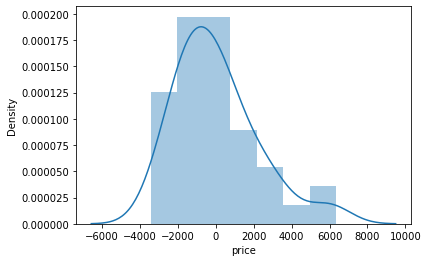

In [109]:
sns.distplot(y_test-y_pred)

In [110]:
y_train_predict=model.predict(x_train)
r2score_train=r2_score(y_train,y_train_predict)
r2score_train

0.8517358259461607

In [111]:
y_pred=model.predict(x_test)
r2score_test=r2_score(y_test,y_pred)
r2score_test

0.8309676045474025

## DECISION TREE REGRESSOR

In [112]:
from sklearn.tree import DecisionTreeRegressor
dsr=DecisionTreeRegressor()
dsr.fit(x_train,y_train)

DecisionTreeRegressor()

In [113]:
y_train_predict=dsr.predict(x_train)
R2=r2_score(y_train,y_train_predict)
R2

0.9995293645917083

##### Use K Fold cross validation to measure accuracy of our DecisionTreeRegressor model

In [114]:
from sklearn.model_selection import ShuffleSplit
cv=ShuffleSplit(n_splits=5, test_size=0.2,random_state=0)
from sklearn.model_selection import cross_val_score
cross_val_score(DecisionTreeRegressor(),x,y,cv=cv)

array([0.62264269, 0.83730324, 0.57154954, 0.80532458, 0.4534677 ])

## RANDOM FOREST REGRESSOR

In [115]:
# Step 3 Creating model
from sklearn.ensemble import RandomForestRegressor
LR= RandomForestRegressor() # object creation
LR.fit(x_train,y_train) # training of linear regression
y_train_predict=LR.predict(x_train)

In [116]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
r2score_train=r2_score(y_train,y_train_predict)

In [117]:
r2score_train

0.9637764560417396

#### Use K Fold cross validation to measure accuracy of our RandomForestRegressor model

In [118]:
from sklearn.model_selection import ShuffleSplit
cv=ShuffleSplit(n_splits=5, test_size=0.2,random_state=0)
from sklearn.model_selection import cross_val_score
cross_val_score(RandomForestRegressor(),x,y,cv=cv)

array([0.71743179, 0.84987773, 0.83373246, 0.81641861, 0.63952072])

# Conclusion :

#### From the above models Decision Tree Regressor gives the Best Result. Hence we opt it for the use 

In [119]:
## Thank You ##